# **01/21/2026**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("/content/customer_churn (1).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# print the first 5 columns and rows
print(df.head().to_string())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

In [6]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Extract the 5th column and store it in customer_5 and show column name
customer_5 = df.iloc[:, 4]
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [11]:
# Extract the 15th column and store it in customer_15
customer_15 = df.iloc[:, 14]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


**Extract all the male senior citizen whose payments method is electronic check and store the result in 'senior_male_experience'.**

In [13]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [14]:
senior_male_experience = df[(df["SeniorCitizen"] == 1) & (df["gender"] == "Male") & (df["PaymentMethod"] == "Electronic check")]
senior_male_experience

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


**Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in 'customer_total_tenure'.**


In [19]:
customer_total_tenure = df[(df["tenure"] > 70) | (df["MonthlyCharges"] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


**Extract all the customers whose contact is of two years, payment method is mailed check and the value of churn is 'yes' and store the result in 'two_mail_ways'**


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [24]:
two_mail_ways = df[(df["Contract"] == "Two year") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")]
two_mail_ways

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


**Extract 333 random records from customer_churndataframe and store the result in 'customer_333'.**


In [25]:
customer_333 = df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6431,3266-FTKHB,Male,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.15,343.45,No
5978,0239-OXEXL,Female,0,No,No,46,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,84.25,3847.6,No
90,4767-HZZHQ,Male,0,Yes,Yes,30,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),82.05,2570.2,No
4471,2479-BRAMR,Male,1,Yes,No,41,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),83.75,3273.55,Yes
6000,9503-XJUME,Male,0,No,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.65,928.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,5472-CVMDX,Female,0,No,No,68,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,38.90,2719.2,No
5450,7503-ZGUZJ,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.65,84.65,Yes
3163,9281-OFDMF,Male,1,No,No,39,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,90.70,3413.25,No
3875,2403-BCASL,Male,1,Yes,Yes,41,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,4534.9,Yes


**Get the count of different levels from the churn column.**

In [27]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


**Data Visualization**


**Build a bar plot from the 'InternetService' Column:**


**a. Set x-axis label to 'Categories to internet service'**


**b. Set y-axis label to 'Count to categories'**


**c. Set the title of plot to 'Distribution of internet service'**


**d. Set the color of bars to be orange.**

In [31]:
Is_count = df["InternetService"].value_counts()
Is_count

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [34]:
x = Is_count.index
x

Index(['Fiber optic', 'DSL', 'No'], dtype='object', name='InternetService')

In [35]:
y = Is_count.values
y

array([3096, 2421, 1526])

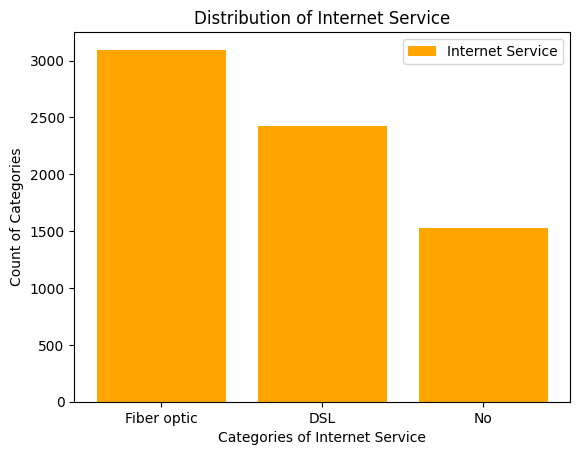

In [38]:
plt.bar(x, y, color= "orange", label = "Internet Service")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.legend()
plt.show()


**Build a histogram for the 'tenure' colum:**


**a. Set the number of bins to be 30**


**b. Set the color of the bins to be 'green'**


**c. Assign the title 'Distribution of tenure'**

In [46]:
tenure_counts = df["tenure"].value_counts()
tenure_counts

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [49]:
x = tenure_counts.index
x

Index([ 1, 72,  2,  3,  4, 71,  5,  7,  8,  9, 70, 12, 10,  6, 13, 68, 11, 15,
       67, 18, 69, 24, 22, 66, 35, 17, 23, 56, 16, 52, 64, 26, 25, 60, 14, 65,
       61, 46, 19, 30, 27, 29, 63, 20, 62, 41, 53, 32, 54, 50, 47, 51, 58, 49,
       37, 34, 31, 42, 57, 43, 55, 40, 33, 48, 21, 45, 59, 38, 28, 39, 44, 36,
        0],
      dtype='int64', name='tenure')

In [50]:
y = tenure_counts.values
y

array([613, 362, 238, 200, 176, 170, 133, 131, 123, 119, 119, 117, 116,
       110, 109, 100,  99,  99,  98,  97,  95,  94,  90,  89,  88,  87,
        85,  80,  80,  80,  80,  79,  79,  76,  76,  76,  76,  74,  73,
        72,  72,  72,  72,  71,  70,  70,  70,  69,  68,  68,  68,  68,
        67,  66,  65,  65,  65,  65,  65,  65,  64,  64,  64,  64,  63,
        61,  60,  59,  57,  56,  51,  50,  11])

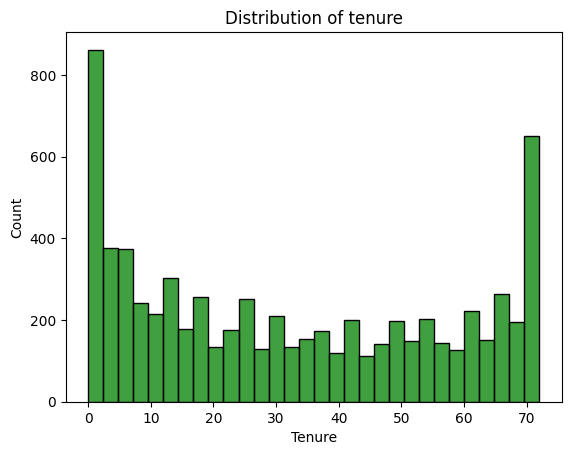

In [51]:
sns.histplot(df["tenure"], bins = 30, color = "green")
plt.title("Distribution of tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

# Logistic regression:


# **Build a simple logistic regression model where dependent variable is 'Churn' and independent variable is 'MonthlyCharges': **


**a. Divide the dataset in 65:35 ratio,**


**b. Build the model on train set and predict  the values on test set.**


**c. Build the confusion matrix and get the accuracy score.**


In [55]:
# check for nulls
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df[["MonthlyCharges", "Churn"]]

,MonthlyCharges,Churn
0,29.85,No
1,56.95,No
2,53.85,Yes
3,42.30,No
4,70.70,Yes
...,...,...
7038,84.80,No
7039,103.20,No
7040,29.60,No
7041,74.40,Yes


<Axes: ylabel='MonthlyCharges'>

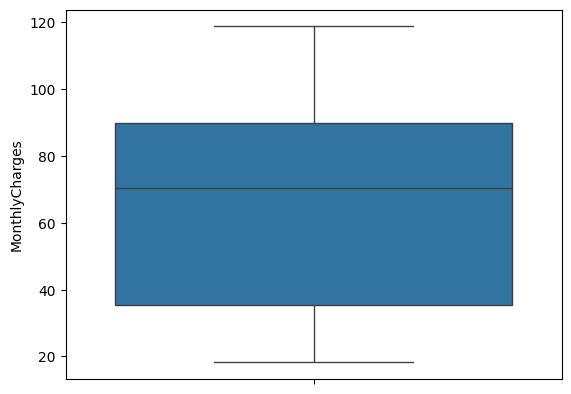

In [58]:
# check for outliers
# no outliers
sns.boxplot(df["MonthlyCharges"])

In [61]:
# label encoding for Churn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
df["Churn"] = le.fit_transform(df["Churn"])
df["Churn"]

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [85]:
x = df[["MonthlyCharges"]] # independent variable
y = df["Churn"] # dependent variable


In [86]:
# split the data into training and testing

from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, random_state=0)

In [88]:
# build a logistic regression model

from sklearn.linear_model import LogisticRegression
final_model = LogisticRegression()

In [89]:
# train the model bypassing both ques and as=ns of training data

final_model.fit(x_train,y_train)

LogisticRegression()

In [90]:
y_pred = final_model.predict(x_test)

In [91]:
# in logistic regression you will use accuracy score to evaluate the perfromance

from sklearn.metrics import *
print("Accuracy Score is : ", accuracy_score(y_test,y_pred)*100)

Accuracy Score is :  73.60097323600974


In [92]:
confusion_matrix(y_test,y_pred)

array([[1815,    0],
       [ 651,    0]])

**d. Build multiple logistic regression model where dependent variable is 'Churn' and independent variable are 'tenure' and monthly charges.**


**e. Divide the dataset in 80:20 ratio.**


**f. Build the model on train set and predict the values.**


**g. Build the confusion matrix and get the accuracy score.**

In [93]:
x = df[["tenure", "MonthlyCharges"]]
y = df["Churn"]

In [94]:
# split train test

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [95]:
# build logistic model
logReg = LogisticRegression()

In [96]:
logReg.fit(x_train, y_train)

LogisticRegression()

In [97]:
y_pred = logReg.predict(x_test)

In [98]:
print("Accuracy Score is : ", accuracy_score(y_test,y_pred)*100)

Accuracy Score is :  77.35982966643009


In [99]:
print("Confusion Matrix is : ",
      confusion_matrix(y_test,y_pred))


Confusion Matrix is :  [[934 107]
 [212 156]]


The confusion matrix [[934 107] [212 156]] provides a breakdown of the model's performance on the test set for predicting 'Churn'. Here's what each number represents:

934 (True Negative): The model correctly predicted that 934 customers would not churn.
107 (False Positive): The model incorrectly predicted that 107 customers would churn, but they actually did not churn (Type I error).
212 (False Negative): The model incorrectly predicted that 212 customers would not churn, but they actually did churn (Type II error).
156 (True Positive): The model correctly predicted that 156 customers would churn.

In [100]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision Score is: {precision:.4f}")
print(f"Recall Score is: {recall:.4f}")

Precision Score is: 0.5932
Recall Score is: 0.4239
